#Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd  /content/drive/MyDrive/Conjoint Analysis

In [4]:
# Install library
!pip install squarify

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import os
file_path = '/content/drive/MyDrive/Conjoint Analysis/netflix_customer_survey.csv'
if os.path.exists(file_path): # Check if the file exists
  df = pd.read_csv(file_path)
  df.head()
else:
  print(f"File not found at: {file_path}")
import statsmodels.api as sm
import matplotlib.pyplot as plt
import squarify

In [6]:
#Load the data
df = pd.read_csv('/content/drive/MyDrive/Conjoint Analysis/netflix_customer_survey.csv')
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected
0,7,2,10,HBO,one_per_day,1
1,7,6,8,Marvel,one_per_show,1
2,7,4,15,Disney,one_per_day,1
3,7,5,10,HBO,one_per_day,1
4,7,1,20,Soccer,one_per_show,1


#Data Processing

In [7]:
# Isolate X and y
y = df.selected
X = df.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,ExtraContent,ads
0,2,10,HBO,one_per_day
1,6,8,Marvel,one_per_show


In [8]:
#Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,price_20,ExtraContent_Disney,ExtraContent_HBO,ExtraContent_Marvel,ExtraContent_Prime originals,ExtraContent_Soccer,ExtraContent_less content,ads_none,ads_one_per_day,ads_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True


# Regression Model

In [9]:
# Build the Regression Model
model = sm.GLM(y, X_dummy, family = sm.families.Binomial()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2982
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Fri, 09 May 2025   Deviance:                       3896.6
Time:                        16:07:25   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08371
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
NumberAccounts_1                -0.7042      0.090     -7.793      0.000      -0.881      -0.527
NumberAccounts_2                -0.0733      0.088     -0.830      0.407      -0.246       0.100
NumberAccounts_3                -0.0216      0.088     -0.247      0.805      -0.194       0.150
NumberAccounts_4                 0.1253      0.083      1.503      0.133      -0.038       0.289
NumberAccounts_5                 0.1312      0.085      1.547      0.122      -0.035       0.297
NumberAccounts_6                 0.4971      0.082      6.032      0.000       0.336       0.659
price_8                          0.2966      0.085      3.475      0.001       0.129       0.464
price_10                         0.2205      0.087      2.531      0.011       0.050       0.391
price_12                         0.2017      0.083      2.445      0.015       0.040       0.364
price_15                         0.0197      0.084      0.234      0.815      -0.145       0.185
price_18                        -0.1028      0.087     -1.180      0.238      -0.273       0.068
price_20                        -0.6813      0.090     -7.570      0.000      -0.858      -0.505
ExtraContent_Disney              0.2280      0.088      2.600      0.009       0.056       0.400
ExtraContent_HBO                 0.2267      0.085      2.662      0.008       0.060       0.394
ExtraContent_Marvel              0.1450      0.084      1.723      0.085      -0.020       0.310
ExtraContent_Prime originals     0.1277      0.087      1.474      0.140      -0.042       0.297
ExtraContent_Soccer             -0.2046      0.085     -2.404      0.016      -0.371      -0.038
ExtraContent_less content       -0.5682      0.087     -6.506      0.000      -0.739      -0.397
ads_none                         0.2079      0.055      3.745      0.000       0.099       0.317
ads_one_per_day                  0.1090      0.056      1.931      0.053      -0.002       0.220
ads_one_per_show                -0.3623      0.057     -6.357      0.000      -0.474      -0.251
================================================================================================
"""

# Conjoint Anaylsis

In [10]:
# Create a DF with the results
df_result = pd.DataFrame({'param_name': model.params.keys(),
                          'partworth': model.params.values,
                          'pval': model.pvalues})
df_result

,param_name,partworth,pval
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15
NumberAccounts_2,NumberAccounts_2,-0.073251,4.065002e-01
NumberAccounts_3,NumberAccounts_3,-0.021623,8.052935e-01
NumberAccounts_4,NumberAccounts_4,0.125293,1.328110e-01
NumberAccounts_5,NumberAccounts_5,0.131202,1.217556e-01
NumberAccounts_6,NumberAccounts_6,0.497114,1.617766e-09
price_8,price_8,0.296594,5.113955e-04
price_10,price_10,0.220500,1.138256e-02
price_12,price_12,0.201748,1.450426e-02
price_15,price_15,0.019741,8.146568e-01


In [11]:
# Identifying the Statistically significant variables
df_result['is_significant'] = (df_result['pval'] < 0.05)
df_result['color'] = ['blue' if x else 'red' for x in df_result['is_significant']]
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15,True,blue
NumberAccounts_2,NumberAccounts_2,-0.073251,4.065002e-01,False,red
NumberAccounts_3,NumberAccounts_3,-0.021623,8.052935e-01,False,red
NumberAccounts_4,NumberAccounts_4,0.125293,1.328110e-01,False,red
NumberAccounts_5,NumberAccounts_5,0.131202,1.217556e-01,False,red


In [12]:
# Sort values
df_result = df_result.sort_values(by = "partworth", ascending = True)

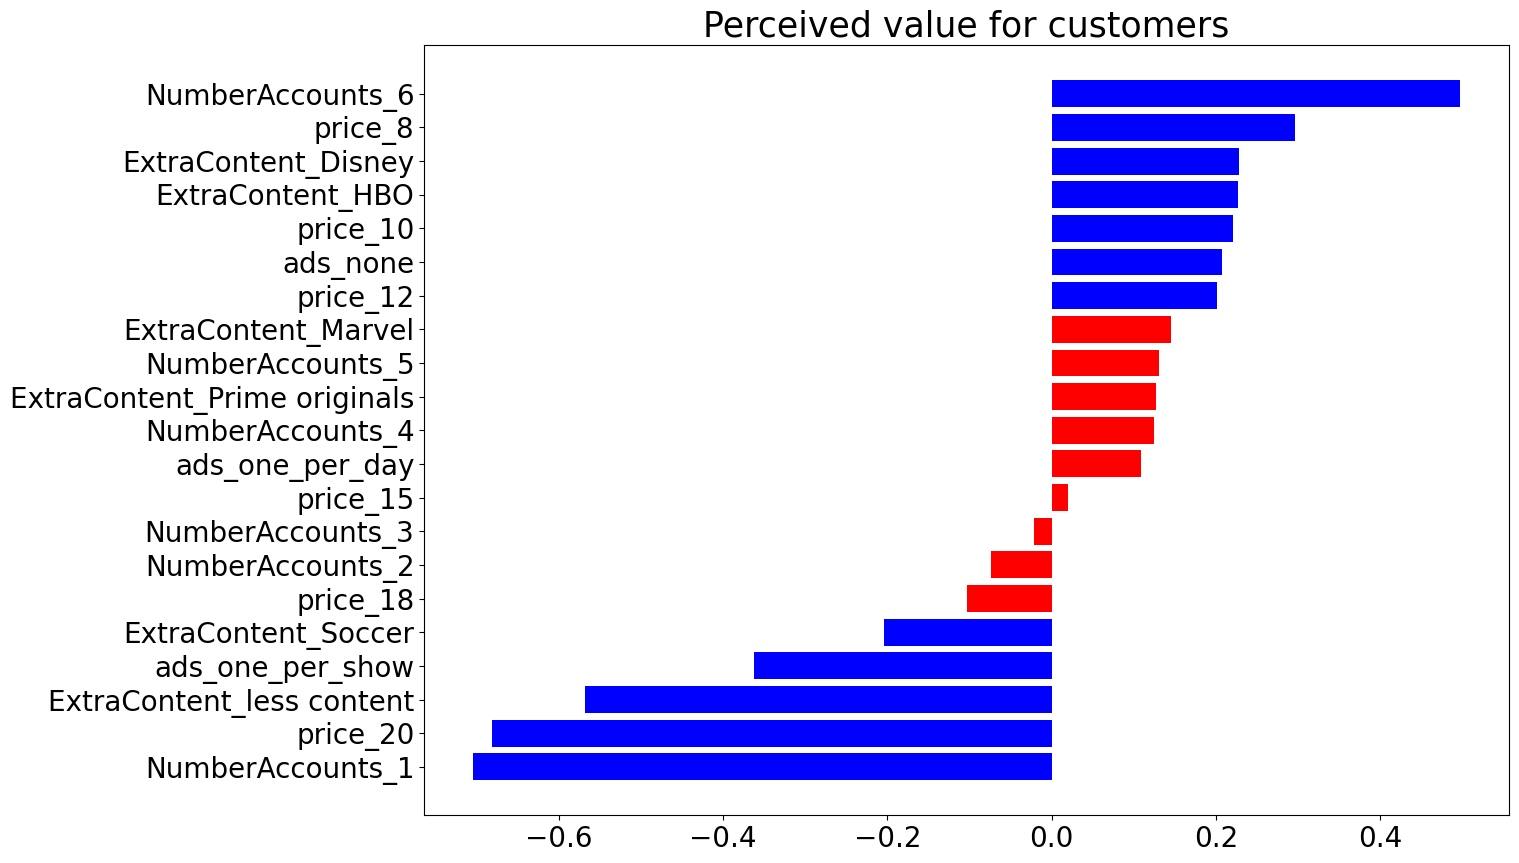

In [13]:
# Plot the Partworth
f, ax = plt.subplots(figsize = (14,10))
values = df_result.partworth
xbar = np.arange(len(values))
plt.title("Perceived value for customers", fontsize = 25)

#Bar Plot
plt.barh(xbar,
         values,
         color = df_result['color'])
# Customizing the ticks
plt.yticks(xbar,
           labels = df_result['param_name'],
           fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

# Specific groups of Features

In [14]:
df_result.head()

,param_name,partworth,pval,is_significant,color
NumberAccounts_1,NumberAccounts_1,-0.704198,6.544261e-15,True,blue
price_20,price_20,-0.681282,3.730474e-14,True,blue
ExtraContent_less content,ExtraContent_less content,-0.568203,7.697109e-11,True,blue
ads_one_per_show,ads_one_per_show,-0.362278,2.052008e-10,True,blue
ExtraContent_Soccer,ExtraContent_Soccer,-0.204567,1.622982e-02,True,blue


In [15]:
# Isolate the feature group
feature = "price"
attributes = []
coefficients = []
for i in range(len(df_result)):
  if df_result.iloc[i,0].find(feature) == 0:
    attributes.append(df_result.iloc[i,0])
    coefficients.append(df_result.iloc[i,1])

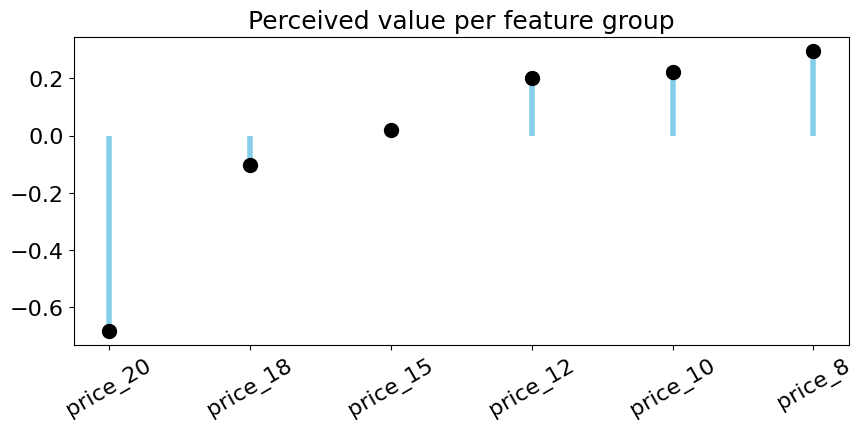

In [16]:
# Lollipop chart
# Plot the Partworth
f, ax = plt.subplots(figsize = (10,4))
plt.title("Perceived value per feature group", fontsize = 18)

#Lollipop plot
(markers, stemlines, basline) = plt.stem(attributes,
                                        coefficients,
                                        linefmt = "-",
                                        markerfmt = "o",
                                        basefmt = " ")
# Customize the lollipop
plt.setp(stemlines,
        color = 'skyblue',
        linewidth = 4)
plt.setp(markers,
        color = 'black',
        markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()

# Feature Importance

In [17]:
# Coefficients
features_partworth = {}
for key, coeff in model.params.items():
  split_key = key.split('_')
  feature = split_key[0]
  if feature not in features_partworth:
    features_partworth[feature] = list()
  features_partworth[feature].append(coeff)
features_partworth

{'NumberAccounts': [-0.7041975840438723,
  -0.0732506364502458,
  -0.0216227561162481,
  0.1252929898582812,
  0.13120150226758978,
  0.4971139578067485],
 'price': [0.2965938682611904,
  0.22050047964155434,
  0.2017482617997638,
  0.019740749777867377,
  -0.10276370473236704,
  -0.681282181425755],
 'ExtraContent': [0.22795094929983067,
  0.22666160162349866,
  0.14504280925136182,
  0.12765167127586477,
  -0.20456682658091807,
  -0.5682027315473843],
 'ads': [0.2078632099942415, 0.10895178230491948, -0.3622775189769076]}

In [18]:
# Calculation: maximum of a feature (price_8) minus minimum of a feature (price 20)
importance_per_feature = {k: max(v) - min(v) for k, v in features_partworth.items()}
importance_per_feature

{'NumberAccounts': 1.2013115418506208,
 'price': 0.9778760496869454,
 'ExtraContent': 0.7961536808472149,
 'ads': 0.5701407289711491}

In [19]:
# Computing the sum of importances
total_importances = sum(importance_per_feature.values())
total_importances

3.5454820013559303

In [20]:
# Relative importance (adds up to 100)
relative_importance_per_feature = {
    k: round(100* v/total_importances, 1) for k, v in importance_per_feature.items()
}
relative_importance_per_feature

{'NumberAccounts': 33.9, 'price': 27.6, 'ExtraContent': 22.5, 'ads': 16.1}

In [21]:
# Build DF
df_importances = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns = ['feature', 'relative_importance'])
df_importances

,feature,relative_importance
0,NumberAccounts,33.9
1,price,27.6
2,ExtraContent,22.5
3,ads,16.1


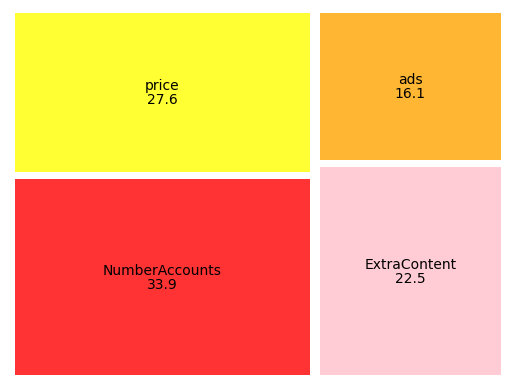

In [22]:
# Treemap
squarify.plot(sizes = df_importances.relative_importance,
              label = df_importances.feature,
              color = ["red", "yellow", "pink", "orange"],
              value = df_importances.relative_importance,
              alpha = 0.8,
              pad = 1)
plt.axis("off")
plt.show()

# Interaction Terms

In [23]:
# Create Interaction terms
df['content_ads'] = df.ExtraContent + "_" + df.ads
df.head()

,customerid,NumberAccounts,price,ExtraContent,ads,selected,content_ads
0,7,2,10,HBO,one_per_day,1,HBO_one_per_day
1,7,6,8,Marvel,one_per_show,1,Marvel_one_per_show
2,7,4,15,Disney,one_per_day,1,Disney_one_per_day
3,7,5,10,HBO,one_per_day,1,HBO_one_per_day
4,7,1,20,Soccer,one_per_show,1,Soccer_one_per_show


In [24]:
# Remove the variables in the interaction term
df_interaction = df.drop(columns= ['ExtraContent', 'ads'])
df_interaction.head()

,customerid,NumberAccounts,price,selected,content_ads
0,7,2,10,1,HBO_one_per_day
1,7,6,8,1,Marvel_one_per_show
2,7,4,15,1,Disney_one_per_day
3,7,5,10,1,HBO_one_per_day
4,7,1,20,1,Soccer_one_per_show


In [36]:
# Isolate X and y
y = df_interaction.selected
X = df_interaction.drop(columns = ['selected', 'customerid'])
X.head(2)

,NumberAccounts,price,content_ads
0,2,10,HBO_one_per_day
1,6,8,Marvel_one_per_show


In [37]:
#Create dummy Variables
X_dummy = pd.get_dummies(X, columns = X.columns)
X_dummy.head()

,NumberAccounts_1,NumberAccounts_2,NumberAccounts_3,NumberAccounts_4,NumberAccounts_5,NumberAccounts_6,price_8,price_10,price_12,price_15,...,content_ads_Marvel_one_per_show,content_ads_Prime originals_none,content_ads_Prime originals_one_per_day,content_ads_Prime originals_one_per_show,content_ads_Soccer_none,content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_show,content_ads_less content_none,content_ads_less content_one_per_day,content_ads_less content_one_per_show
0,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [38]:
# Build the Regression Model
model2 = sm.GLM(y, X_dummy, family = sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               selected   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2972
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1941.8
Date:                Fri, 09 May 2025   Deviance:                       3883.6
Time:                        16:31:40   Pearson chi2:                 3.00e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            0.08767
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
NumberAccounts_1                            -0.7172      0.093     -7.748      0.000      -0.899      -0.536
NumberAccounts_2                            -0.0701      0.090     -0.777      0.437      -0.247       0.107
NumberAccounts_3                            -0.0335      0.089     -0.375      0.708      -0.209       0.142
NumberAccounts_4                             0.1119      0.085      1.323      0.186      -0.054       0.278
NumberAccounts_5                             0.1215      0.086      1.416      0.157      -0.047       0.290
NumberAccounts_6                             0.4920      0.084      5.864      0.000       0.328       0.656
price_8                                      0.2912      0.086      3.371      0.001       0.122       0.460
price_10                                     0.2111      0.089      2.380      0.017       0.037       0.385
price_12                                     0.2004      0.084      2.398      0.016       0.037       0.364
price_15                                     0.0088      0.086      0.103      0.918      -0.159       0.177
price_18                                    -0.1129      0.089     -1.275      0.202      -0.287       0.061
price_20                                    -0.6940      0.093     -7.444      0.000      -0.877      -0.511
content_ads_Disney_none                      0.3349      0.154      2.181      0.029       0.034       0.636
content_ads_Disney_one_per_day               0.5477      0.174      3.155      0.002       0.207       0.888
content_ads_Disney_one_per_show             -0.1556      0.159     -0.979      0.327      -0.467       0.156
content_ads_HBO_none                         0.5294      0.160      3.318      0.001       0.217       0.842
content_ads_HBO_one_per_day                  0.5101      0.155      3.288      0.001       0.206       0.814
content_ads_HBO_one_per_show                -0.3542      0.157     -2.250      0.024      -0.663      -0.046
content_ads_Marvel_none                      0.2575      0.153      1.688      0.092      -0.042       0.557
content_ads_Marvel_one_per_day               0.2302      0.158      1.460      0.144      -0.079       0.539
content_ads_Marvel_one_per_show             -0.0541      0.151     -0.359      0.720      -0.350       0.241
content_ads_Prime originals_none             0.2568      0.158      1.625      0.104      -0.053       0.566
content_ads_Prime originals_one_per_day      0.1291      0.155      0.833      0.405      -0.175       0.433
content_ads_Prime originals_one_per_show     0.0194      0.162      0.120      0.905      -0.298       0.337
content_ads_Soccer_none                      0.1460      0.154      0.947      0.343      -0.156       0.448
content_ads_Soccer_one_per_day 

# Interaction Terms Results

In [61]:
# Create a DF with the results
df_result_interaction = pd.DataFrame({'param_name': model2.params.keys(),
                                      'partworth': model2.params.values,
                                      'pval': model2.pvalues}).sort_values(
                                          by = "partworth"
                                      )
df_result_interaction

,param_name,partworth,pval
content_ads_less content_one_per_show,content_ads_less content_one_per_show,-1.091013,8.205082e-10
NumberAccounts_1,NumberAccounts_1,-0.717221,9.339752e-15
price_20,price_20,-0.694035,9.787712e-14
content_ads_Soccer_one_per_show,content_ads_Soccer_one_per_show,-0.507075,1.704012e-03
content_ads_less content_one_per_day,content_ads_less content_one_per_day,-0.423898,8.718316e-03
content_ads_HBO_one_per_show,content_ads_HBO_one_per_show,-0.354176,2.448042e-02
content_ads_Soccer_one_per_day,content_ads_Soccer_one_per_day,-0.245252,1.148107e-01
content_ads_less content_none,content_ads_less content_none,-0.225287,1.381364e-01
content_ads_Disney_one_per_show,content_ads_Disney_one_per_show,-0.155617,3.273402e-01
price_18,price_18,-0.112940,2.024486e-01


In [65]:
# Isolate the feature group
feature = "content_ads"
attributes = []
coefficients = []
for i in range(len(df_result_interaction)):
  if df_result_interaction.iloc[i,0].find(feature) == 0:
    if df_result_interaction.iloc[i,0].find("none") == -1:
        attributes.append(df_result_interaction.iloc[i,0])
        coefficients.append(df_result_interaction.iloc[i,1])

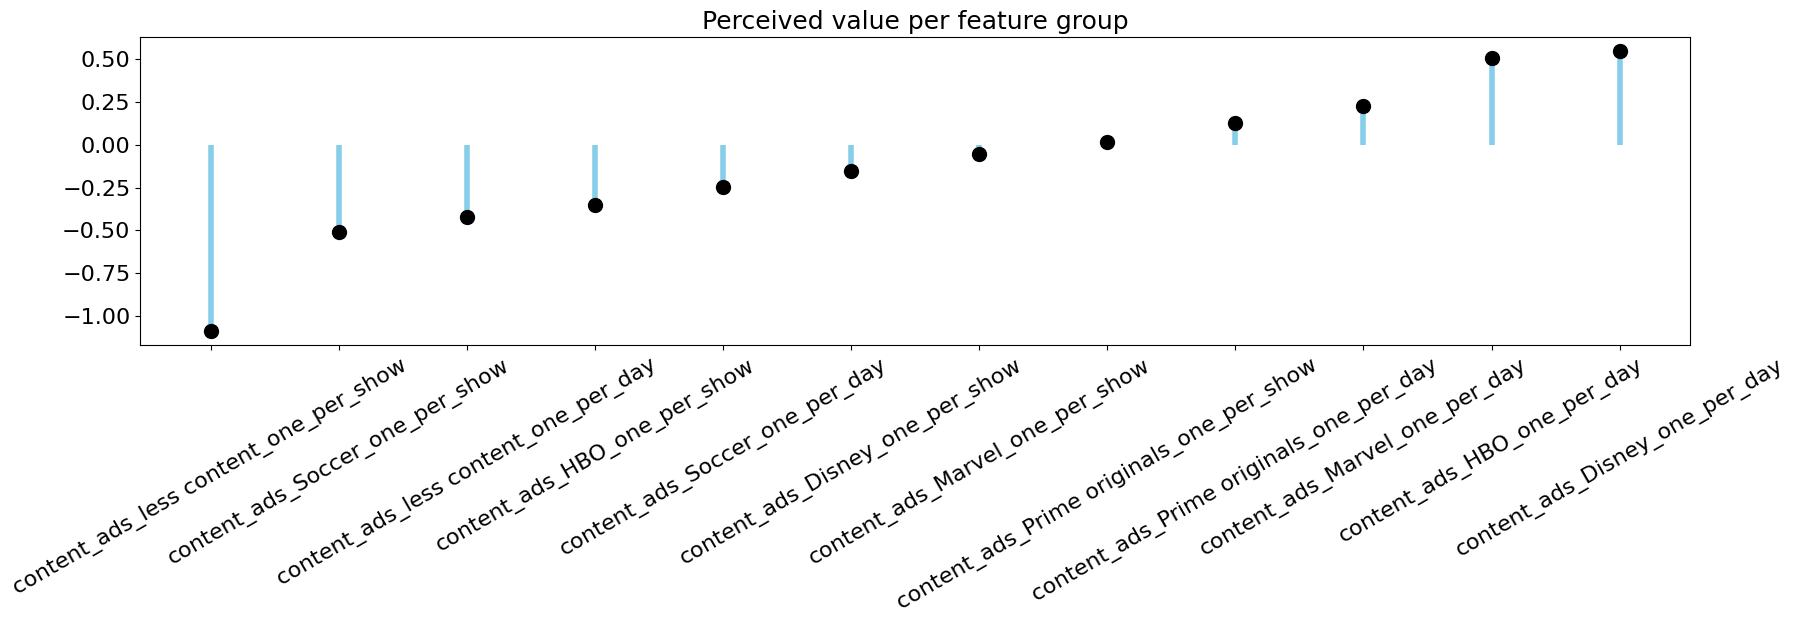

In [66]:
# Lollipop chart
# Plot the Partworth
f, ax = plt.subplots(figsize = (20,4))
plt.title("Perceived value per feature group", fontsize = 18)

#Lollipop plot
(markers, stemlines, basline) = plt.stem(attributes,
                                        coefficients,
                                        linefmt = "-",
                                        markerfmt = "o",
                                        basefmt = " ")
# Customize the lollipop
plt.setp(stemlines,
        color = 'skyblue',
        linewidth = 4)
plt.setp(markers,
        color = 'black',
        markersize = 10)

# Customizing the ticks
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16,
           rotation = 30)

#Plot
plt.show()